![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [28]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [29]:
# inertias=[]
# n = list(range(1,10))
# for k in n:
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(penguins_df_encoded)
#     inertias.append(kmeans.inertia_)

# plt.plot(n, inertias)
# plt.show()

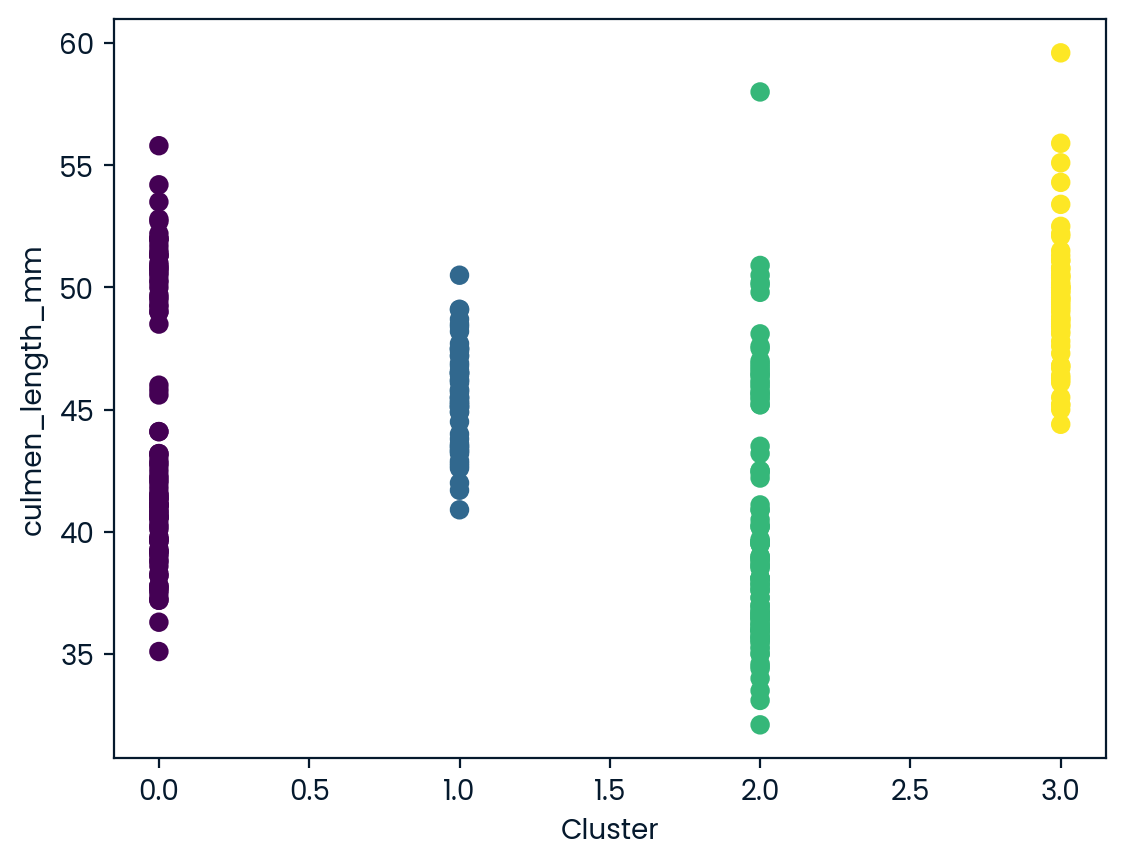

In [30]:
penguins_df_encoded= pd.get_dummies(penguins_df, drop_first=True)
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4, random_state=42)
model = make_pipeline(scaler, kmeans)
model.fit(penguins_df_encoded)
penguins_df['label'] = kmeans.labels_
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_)
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.show()

In [31]:
numeric_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'label']
stat_penguins = penguins_df[numeric_cols].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,45.563793,14.237931,212.706897,4679.741379
2,40.217757,17.611215,189.046729,3419.158879
3,49.473770,15.718033,221.540984,5484.836066
